## Initialisation

In [2]:
%matplotlib widget
# Imports
import numpy as np
import pathlib
import pandas as pd
import pandasgui
import itables
import math
import ipyplot
import matplotlib.pyplot as plt
import tifffile
import pickle
import seaborn as sns
import scipy

# ipywidgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipyfilechooser import FileChooser

# Local imports
import main
import qualitative
import quantitative
from SVD import make_SVD
# sns.set()
# sns.set_palette('bright')
# sns.color_palette()
# sns.set_style("white")~

In [6]:
def lines_to_time(max_line_value, ms_per_line, ticks):
    max_seconds_value = max_line_value * ms_per_line
    ticks_labels = np.round(np.linspace(0, max_seconds_value, ticks), 3)
    return ticks_labels

# Open stored Experiment() object from extraction pipeline

In [7]:
# fs, trig_trace = utilities.file_handling().load_experiment()
choose_object = FileChooser()
def_path = pathlib.Path(r"D:/data_output/")
if def_path.exists() is True:
    choose_object.default_path = r"D:/data_output/"
else:
    choose_object.default_path = pathlib.Path.home()
choose_object.title = "<b>Select experiment object<b>"
choose_object.show_only_dirs = False
choose_object._show_dialog()
display(choose_object)
print("(i.e., the pickled Experiment() file)")

FileChooser(path='D:\data_output', filename='', title='<b>Select experiment object<b>', show_hidden=False, sel…

(i.e., the pickled Experiment() file)


In [9]:
## Load the file and prime so handy variables
file_name = choose_object.selected

# try: 
with open(file_name, "rb") as input_file:
    obj = pickle.load(input_file)
# except PermissionError:
#     raise FileNotFoundError("You accidentally selected a directory. Please find and select .pickle file.")

pand = obj.panda
experiment_names = obj.names

# Load the output 

In [10]:
obj.panda

,0,1,2,3,4
folder_name,nat_mono_2Hz,nat_mono_2Hz_0,nat_mono_2Hz_1,nat_mono_2Hz_2,nat_mono_4Hz
f_index,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_4H...
fs,"[[-4867.91, -4868.258, -4862.638, -4861.3213, ...","[[-4868.749, -4863.1406, -4862.031, -4861.4443...","[[-4866.886, -4867.0093, -4866.6514, -4864.822...","[[-4868.482, -4861.3027, -4859.9995, -4860.178...","[[-4869.6157, -4868.618, -4862.0537, -4857.486..."
cell_numbers,64,60,61,84,28
frame_number,3028,3132,3063,3011,1840
tiff_index,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_4H...
trig_index,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_4H...
trigs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
iscell_index,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_2H...,[D:\data_output\BCs_nat_stims_0405\nat_mono_4H...
iscells,"[[[0.0, 0.1267347830452781], [1.0, 0.999064149...","[[[1.0, 0.9999996845186407], [1.0, 0.998397623...","[[[1.0, 0.9996726549338907], [1.0, 0.998136382...","[[[1.0, 0.9964906959019803], [1.0, 0.622180229...","[[[1.0, 0.9731955709838226], [1.0, 0.999968497..."


In [96]:
f0 = pand[0]["fs"][0]
# f0_corr = f0[100:600] - np.average(f0[0:100])

In [122]:
peaks, props = scipy.signal.find_peaks(f0,  height=None, threshold=None, distance=None, prominence=1, width=None, wlen=None, rel_height=None, plateau_size=None)

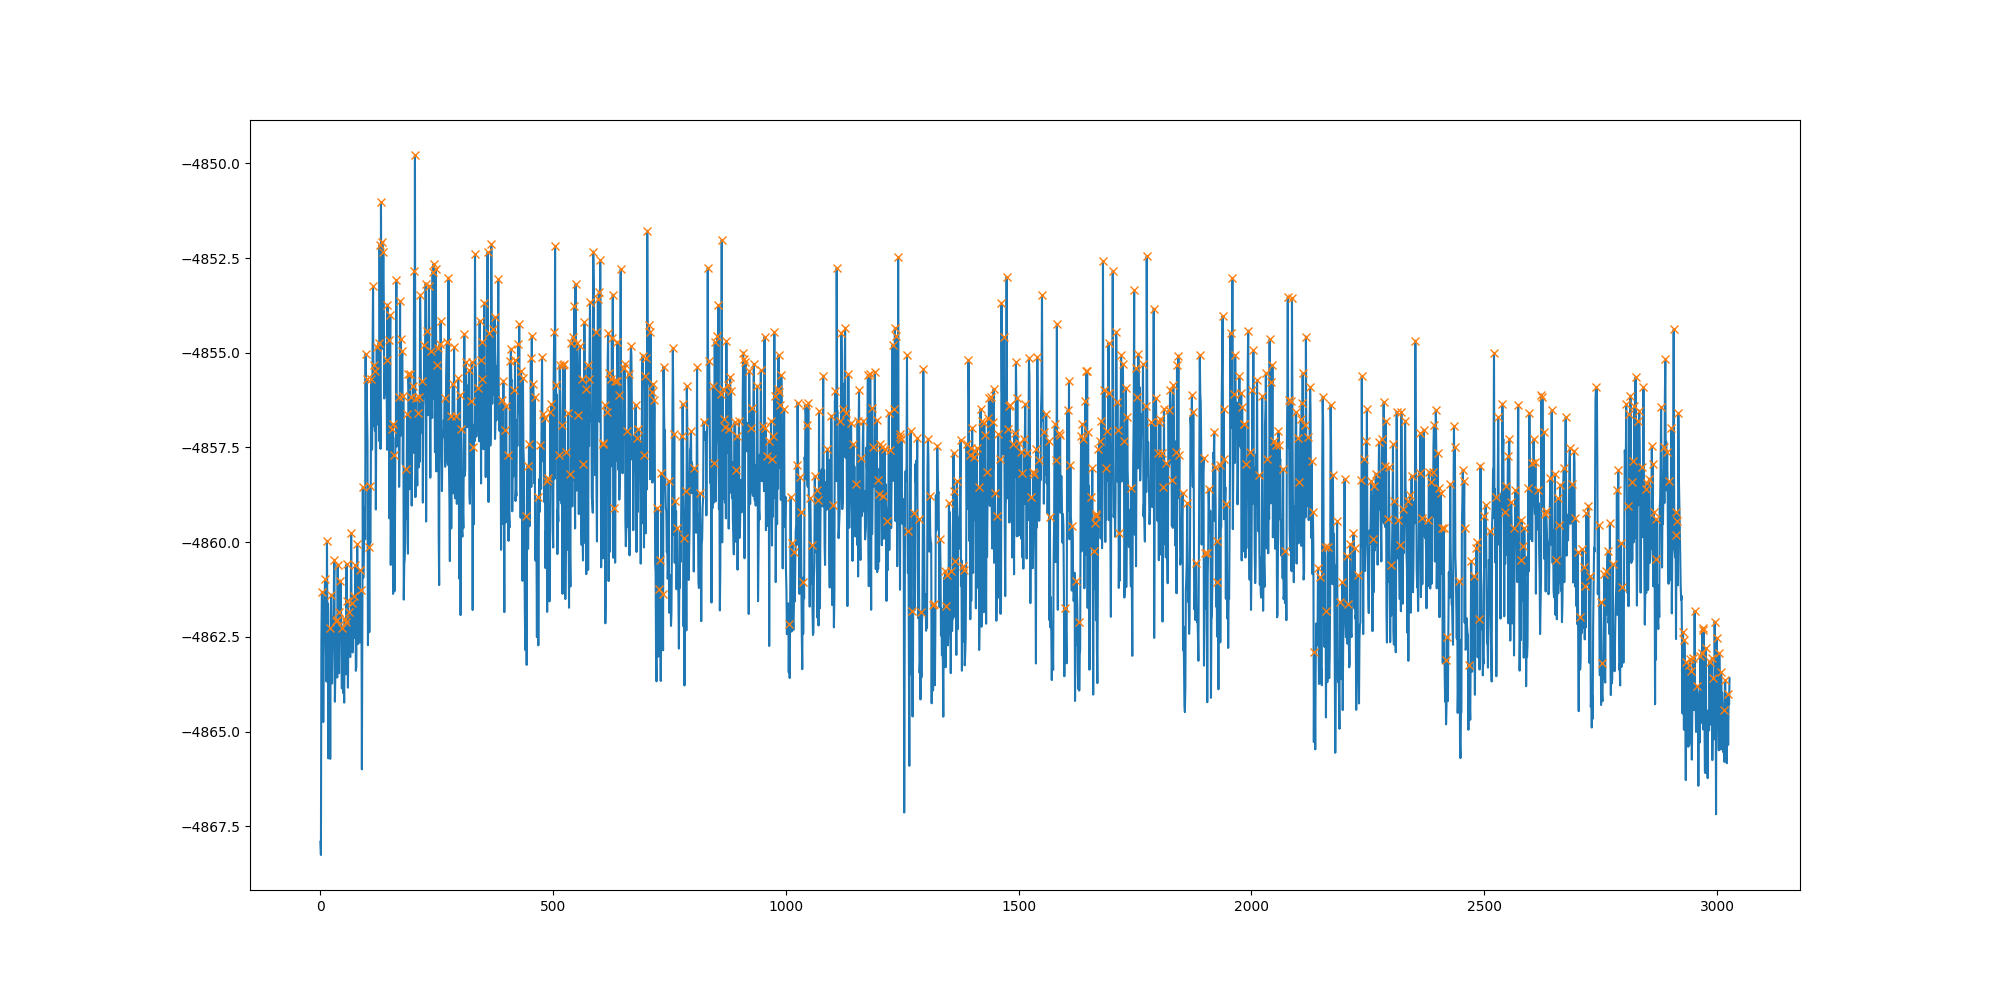

In [124]:
#plt.figure(
plt.close(fig = 'all')
fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(f0)
plt.plot(peaks, f0[peaks], "x")
plt.show()

In [118]:
obj.panda.loc["trigs"][0]

(1, 200447)

In [7]:
len(obj.panda.loc["fs"].item())

66

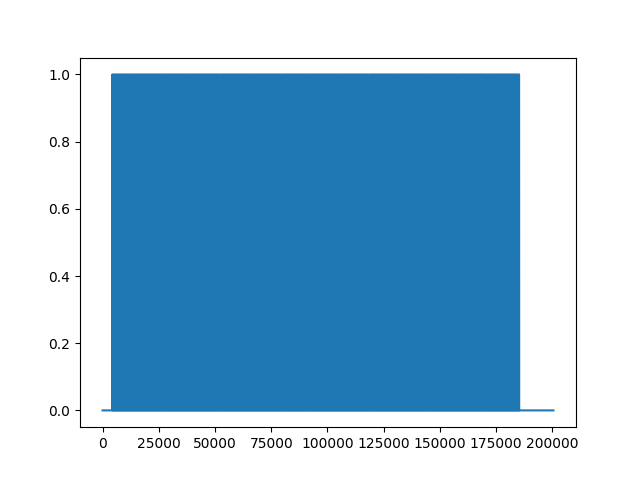

In [112]:
plt.figure()
plt.plot((obj.panda.loc["trigs"][0][0]))

In [9]:

print("In frames:", obj.panda.loc["trig_frames"][4][59] / 128)

KeyError: 4

In [14]:
np.where(obj.panda.loc["trigs"][0][0])[0].shape

(270,)

In [15]:
plt.plot(obj.panda.loc["trig_trials"][0][1])
plt.plot(obj.panda.loc["trig_trials"][0][0], linestyle = 'dashed')
plt.plot(obj.panda.loc["trig_trials"][0][2], linestyle = 'dashed')
plt.title("Trigger segments from 2 different repeats")

Text(0.5, 1.0, 'Trigger segments from 2 different repeats')

## Display Experiment-object's DataFrame
### Display in-line

In [16]:
from itables.sample_dfs import get_indicators
import itables.options as opt

opt.lengthMenu = [20, 50, 100, 200, 500]
opt.maxBytes = 500
opt.classes = ["display", "nowrap"]

df = get_indicators()
df.values.nbytes

itables.show(pand, scrollY="500px", scrollCollapse=True)

## Display the image and the trigger channel

interactive(children=(IntSlider(value=1, description='frame', max=1564), Output()), _dom_classes=('widget-inte…

<function __main__.update_plots(frame)>

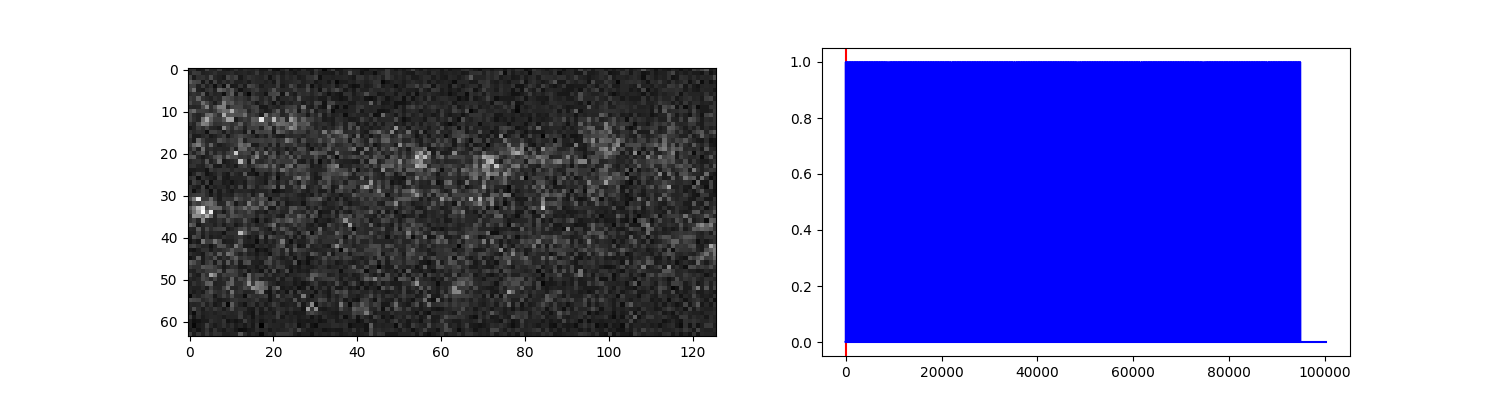

In [17]:
img = pand.loc["tiff_index"][0][0]
trig = pand.loc["trigs"][0][0]
# print("Current image target:", img)
img_arr = tifffile.imread(img)
img_len = len(img_arr)-1
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 4))

    # # View is: (Window 1, WIndow 2)
    # - Window 1
    #   - Img array (imshow)
    #   - Interacts with a slider such that you can scroll through tiff stack
    # - Window 2
    #   - Plots 
    # - Window 3 max projection
def update_plots(frame):
    
    [l.remove() for l in ax2.lines]
    ax1.imshow(img_arr[frame], cmap='gist_gray')
    ax2.axvline(frame, c='r')
    ax2.plot(trig, c='b')
    f.canvas.draw()
interact(update_plots, frame = widgets.IntSlider(min=0, max=img_len, step=1, value=1, continuous_update=True))


## Plot some raw ROIs  

In [18]:
fs_to_plot = obj.fs[experiment]
a = widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=len(fs_to_plot),
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

def wrap_plot(toople):
    # axs, fig = plt.subplots(1, 2)
    from_num = toople[0]
    to_num = toople[1]
    qualitative.plot_traces(fs_to_plot, from_num, to_num)
interact(wrap_plot, toople = a)

NameError: name 'experiment' is not defined

In [19]:
# Sanity check for time transformation
frames = obj.fs[0].shape[1]
linespeed = 0.001
x_lines = 200
y_lines = 64
pix_per_frame = x_lines * y_lines
seconds_per_frame = linespeed*y_lines
frames_per_second = 1/seconds_per_frame
elapsed_time_for_rec = frames * seconds_per_frame
print("Frames:", frames)
print("Seconds per frame:", seconds_per_frame)
print("Frames per second:", frames_per_second)
print("Pixels per frame:", pix_per_frame)
print("Target time (s):", 10 * 30 * 0.5, "ish")
print("Actual time (s):", elapsed_time_for_rec)

Frames: 1565
Seconds per frame: 0.064
Frames per second: 15.625
Pixels per frame: 12800
Target time (s): 150.0 ish
Actual time (s): 100.16


## Plot the average trace for a given experiment and a given ROI 

In [63]:
experiment = 0
roi = 21

In [66]:
def plot_averages(f_avg, f_trial, trig_trial, trig_avg, roi, **kwargs): #, trigger, mode, ):
    fig, ax1 = plt.subplots(figsize= (12, 4), dpi = 100)
    ax2 = ax1.twinx()
    # beauty_trig = trig_avg[:-1] > trig_avg[1:]
    binary = np.where(trig_avg == 1)[0]
    for i in binary:
        ax2.axvline(i, c = 'black', linewidth = 0.5)
    for i in range(f_trial.shape[0]):
        ax1.plot(f_trial[i][roi], color = 'lightgrey')
    ax1.plot(f_avg[roi], color = '#ca00ff')
    if "fps" in kwargs:
        ax1.set_xlabel("Time (s)")
        original_tick_num = f_avg.shape[1]
        new_tick_num = 11
        
        spacing = np.linspace(0, original_tick_num, new_tick_num)
        ax1.set_xticks(spacing)
        ax1.set_xticklabels(
            np.round(np.linspace(0, original_tick_num/kwargs["fps"], new_tick_num), 1))
        
        
        ax1.set_xlabel("Time (s)")
    else:
        ax1.set_xlabel('"Lines"') # was "Frames"
    ax1.set_ylabel("Flouresence")
    # ax1.set_ylim(None, -4860)
    ax1.set_xlim(0, len(f_avg[roi]))
    ax2.set_ylim(0, 1)
    ax2.set_axis_off()
    # plt.title(f"ROI {roi} in experiment file {experiment_names[experiment]}")
    plt.show()
    return fig

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_10272\2007677741.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize= (12, 4), dpi = 100)


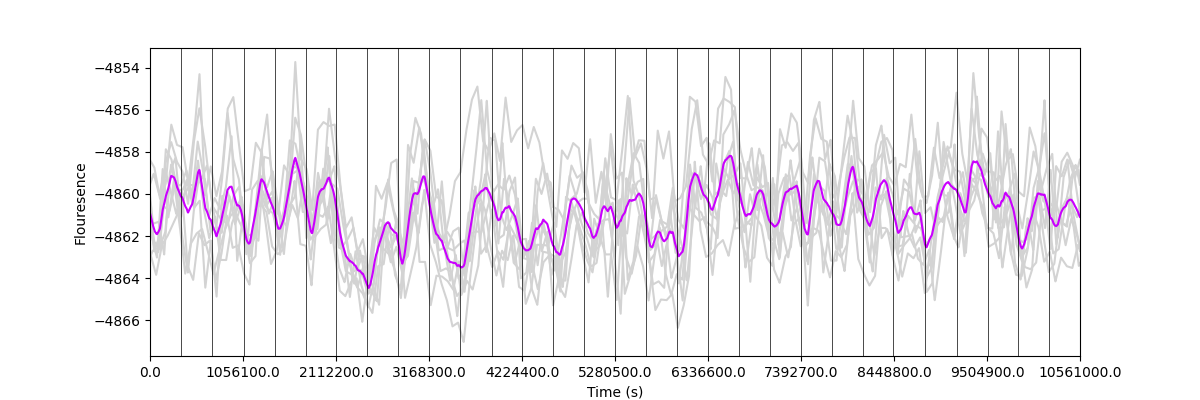

In [67]:
# roit 18 of nat_mono_2Hz

# def plot_avg(exp, roi):
# fig = plot_averages(pand.loc["f_avgs"][experiment], pand.loc["f_trials"][experiment], pand.loc["trig_trials"][experiment], pand.loc["trig_avgs"][experiment], roi)
fig = plot_averages(pand.loc["f_avgs"][experiment], pand.loc["f_trials"][experiment], pand.loc["trig_trials"][experiment], pand.loc["trig_avgs"][experiment], roi, fps = 0.001)
plt.title(f"ROI {roi} in experiment file {experiment_names[experiment]}")
fig.savefig(pathlib.Path.home().joinpath(fr"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\indv_F_ROI{roi}.svg"), 
            transparent=True, bbox_inches = 'tight', pad_inches = 0)
# interact(plot_avg, exp = 0, roi = 0)

In [68]:
def plot_heatmap(f, trigger, normalize = 1, **kwargs):
    color_map = 'magma'
    # f = np.delete(f, [5, 6, 26, 28, 46], 0) # , 22, 24
    fig = plt.figure(figsize=(12,6), dpi = 100)
    if normalize == 1:
        def normalize(data):
            return (data - np.mean(data)) / np.std(data)
            # return np.linalg.norm(data)
            # return (data - data.min()) / (data.max() - data.min())
        norm_f_array = normalize(f)
        heatmap = plt.imshow(norm_f_array, aspect = 'auto', cmap = color_map, interpolation = 'none')
        plt.clim(-2, 2.0)
    else:
        heatmap = plt.imshow(f, aspect = 'auto', cmap = color_map,  interpolation = 'none')   
    if "colors" in kwargs:
        color_list = kwargs["colors"]# ['m', 'b', 'g', 'r']
        # Make a simple counter 
        counter = 0
        # To plot lines for stimulus event
        for n, i in enumerate(trigger):
            # Where trigger channel has signal
            if trigger[n] == 1:
                # 
                if counter == 3:
                    plt.axvspan(n, n+1, facecolor=color_list[counter], alpha=0.5)
                    counter = 0
                else:
                    plt.axvspan(n, n+1, facecolor=color_list[counter], alpha=0.5)
                    counter += 1
    if "events" in kwargs:
        binary = np.where(trigger == 1)[0]
        for i in binary:
            plt.axvline(i, c = 'white', linewidth = 0.5)
    plt.colorbar()
    return fig

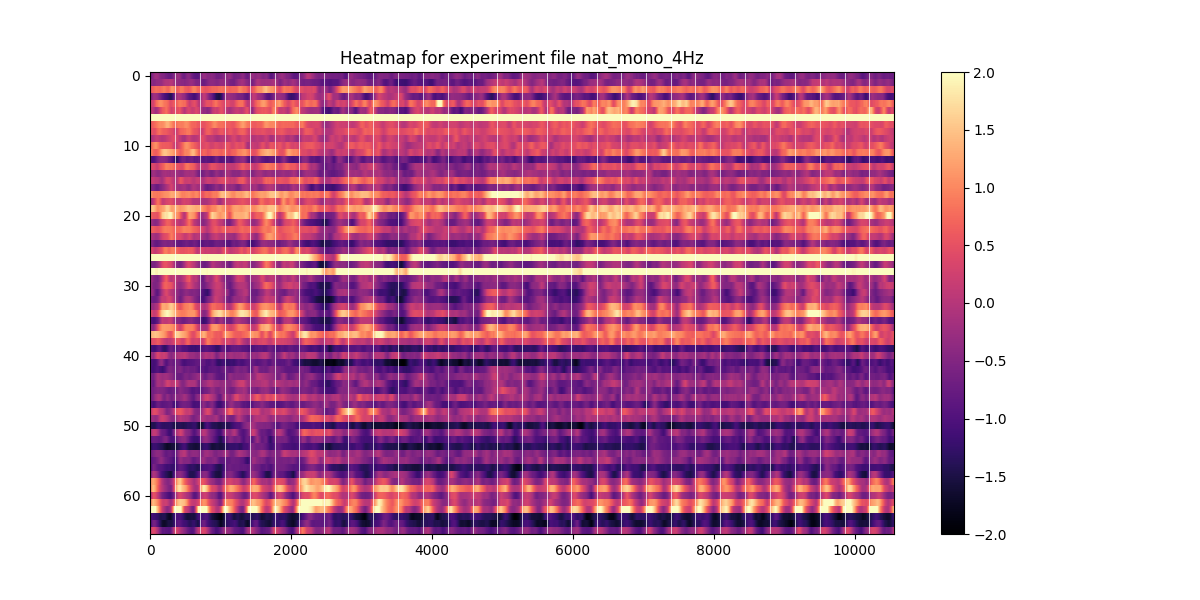

In [24]:
# for experiment in range(len(pand.columns)):
for experiment in range(len(pand.columns)):
    fig1 = plot_heatmap(obj.avgs[experiment], obj.panda.loc["trig_avgs"][experiment], normalize = 1, events = True)
    plt.title(f"Heatmap for experiment file {experiment_names[experiment]}")

In [25]:
obj.avgs[experiment][3].shape[0]/64

165.015625

In [26]:
pathlib.Path.home().joinpath(r"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster")

WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Conferences/FASEB/FASEB poster')

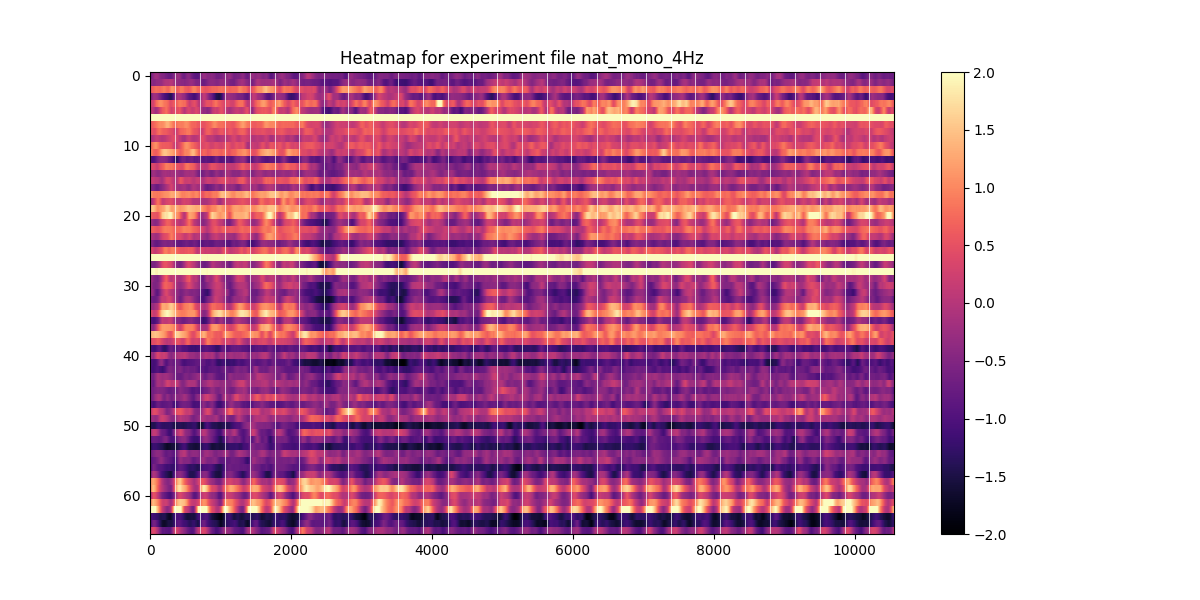

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_27388\393677024.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(pathlib.Path.home().joinpath(r"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\heatmap.svg"),  papertype = 'a0')


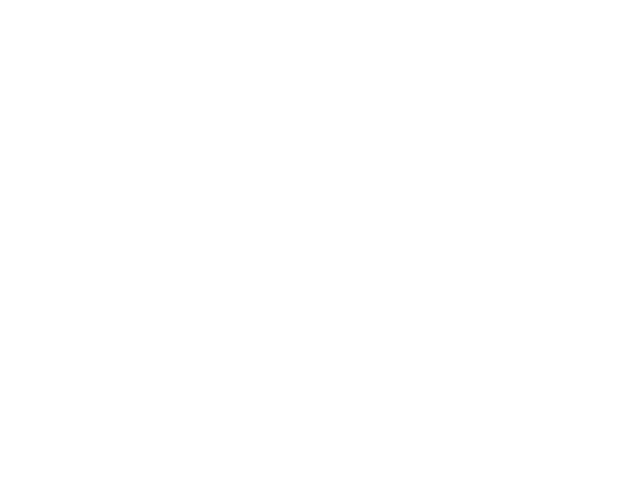

In [27]:
# for experiment in range(len(pand.columns)):
plt.figure()
fig1 = plot_heatmap(obj.avgs[experiment], obj.panda.loc["trig_avgs"][experiment], normalize = 1, events = True)
plt.title(f"Heatmap for experiment file {experiment_names[experiment]}")
plt.show()
plt.savefig(pathlib.Path.home().joinpath(r"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\heatmap.svg"),  papertype = 'a0')

In [ ]:
svd1 = make_SVD(obj.avgs[0][11], obj.panda.loc["trig_avgs"][0])

In [10]:
svd1.uxv.shape

NameError: name 'svd1' is not defined

In [ ]:
plt.imshow(svd1.matrix, aspect='auto', interpolation = 'none')
plt.show()

In [11]:
plt.imshow(svd1.uxv.T, aspect='auto', interpolation = 'none')
plt.show()

NameError: name 'svd1' is not defined

In [ ]:
svd = make_SVD(obj.avgs[0][54], obj.panda.loc["trig_avgs"][0])

In [12]:
plt.imshow(svd.uxv.T)
plt.show()

NameError: name 'svd' is not defined

In [ ]:
svd.trig_onset_index

KeyError: 4

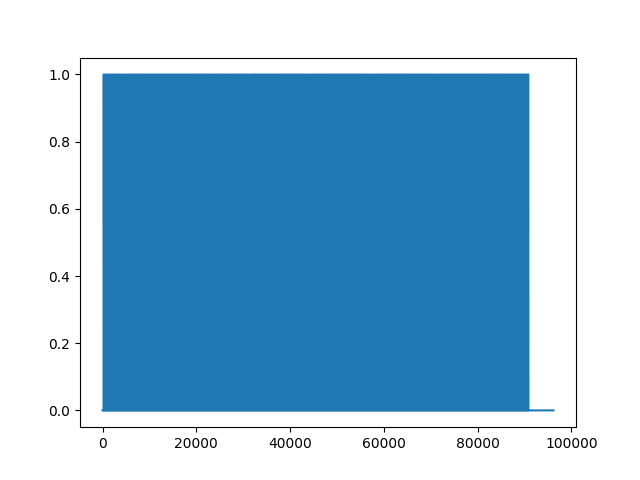

In [13]:
fig, ax = plt.subplots()
plt.plot(obj.panda.loc["trigs"][0][0][4000:])
ax.set_xticks(np.linspace(0, len(obj.panda.loc["trigs"][4][0]), 200))
ax.set_xticklabels(lines_to_time(len(obj.panda.loc["trigs"][4][0]), 0.001, 200))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Trig ON/OFF")
plt.show()

In [85]:
len(obj.panda.loc["trigs"][0][0])

200447

In [37]:
obj.panda.loc["trig_avgs"][0].shape

(18104,)

In [11]:
obj.panda.loc["trig_avgs"][0][:-1] > obj.panda.loc["trig_avgs"][0][1:])

(18134,)

In [17]:
obj.panda.loc["trig_trials"][0].shape

(10, 18135)

In [21]:
obj.panda.loc["trig_trials"][0]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
obj.panda.loc["f_trials"][0].shape

(10, 64, 18135)